In [5]:
import face_recognition
import matplotlib.pyplot as plt

In [6]:
class NoseFinder():
    def __init__(self,image_path):
        self.image_path = image_path
    
    def _load_image(self):
        image = face_recognition.load_image_file(self.image_path)
        
        return image
    
    def find_nose(self):
        face_landmarks_list = face_recognition.face_landmarks(self._load_image())
        
        points = []
        
        points.append(face_landmarks_list[0]['nose_bridge'][0])
        points.append(face_landmarks_list[0]['nose_tip'][0])
        points.append(face_landmarks_list[0]['nose_tip'][-1])
        points.append(face_landmarks_list[0]['left_eye'][3])
        points.append(face_landmarks_list[0]['right_eye'][0])
        
        return points
    
    def _crop_image(self,percent):
        
        image = face_recognition.load_image_file(self.image_path)
        
        points = self.find_nose()
        
        y1 = int(points[0][1]*(1-percent))
        y2 = int(points[2][1]*(1+percent))
        x1 = int(points[3][0]*(1-percent))
        x2 = int(points[2][0]*(1+percent))
                
        cropped = image[y1:y2,x1:x2]
        
        return cropped
    
    def plot_comparisson(self,percent):
        image = self._load_image()
                
        f,ax = plt.subplots(1,2,figsize=(15,9))
        ax[0].axis('off')
        ax[0].set_title('Original')     
        ax[0].imshow(image)
        
        cropped = self._crop_image(percent)
        
        ax[1].axis('off')
        ax[1].set_title('Cropped')     
        ax[1].imshow(cropped)
        
        

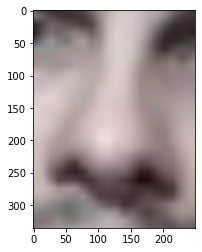

In [7]:
plt.imshow(NoseFinder('data3.png')._crop_image(0.1))

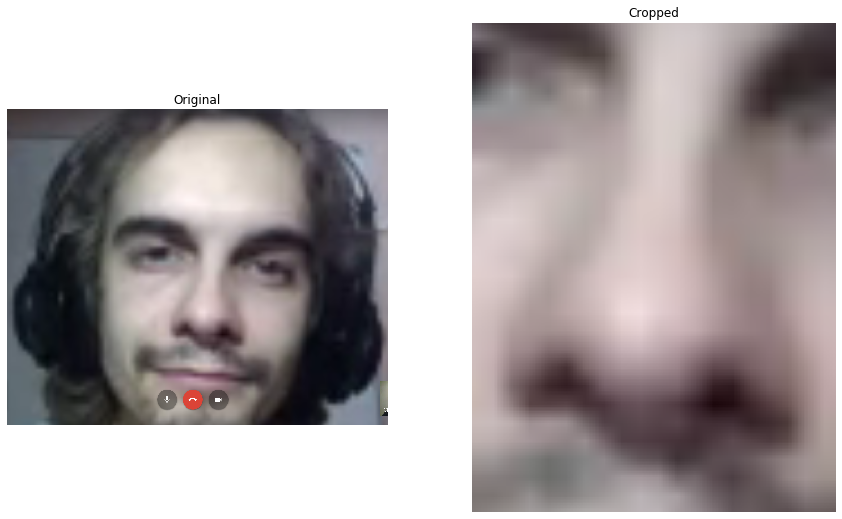

In [8]:
NoseFinder('data3.png').plot_comparisson(0.1)